# Tomato Disease Classification
Developing a model for predecting the disease for leaf of tomato.

In [6]:
# Developing a machine learning model for image classfication using CNN.

## importing libraries
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [7]:
## Initializing the CNN Model
np.random.seed(1337)
classifier = Sequential()

classifier.add(Convolution2D(32, 3, 3, input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(16, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(8, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding='same'))


classifier.add(Flatten())

In [8]:
#hidden layer
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dropout(0.5))

#output layer
classifier.add(Dense(10, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())
#plot_model(classifier, show_shapes=True, to_file='PlantVillage_CNN.png')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 42, 42, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 8)           1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 8)         

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical' )
label_map = (training_set.class_indices)

print(label_map)

test_set = test_datagen.flow_from_directory(
        'val',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical')


history=classifier.fit_generator(
        training_set,
        steps_per_epoch=20,
        epochs=1000,
        validation_data=test_set,
        validation_steps=100)

classifier.save_weights('keras_potato_trained_model_weights.h5')
print('Saved trained model as %s ' % 'keras_potato_trained_model_weights.h5')

Found 10000 images belonging to 10 classes.
{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
Found 1000 images belonging to 10 classes.


C:\Users\KIIT\AppData\Local\Temp\ipykernel_14184\2248095259.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=classifier.fit_generator(


Epoch 1/1000
14/20 [====================>.........] - ETA: 2s - loss: 2.3027 - accuracy: 0.1060

KeyboardInterrupt: 

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical' )
label_map = (training_set.class_indices)

print(label_map)

test_set = test_datagen.flow_from_directory(
        'val',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical')

train_batch_size = 128
val_batch_size = 128
num_epochs = 70
train_images = 10000
val_images = 1000


history=classifier.fit(
        training_set,
        steps_per_epoch=train_images // train_batch_size,
        epochs=num_epochs, 
        validation_data=test_set,
        validation_steps=val_images // val_batch_size)

classifier.save_weights('test.h5')
print('Saved trained model as %s ' % 'test.h5')

Found 10000 images belonging to 10 classes.
{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
Found 1000 images belonging to 10 classes.
Epoch 1/70
17/78 [=====>........................] - ETA: 27s - loss: 2.2927 - accuracy: 0.1618

KeyboardInterrupt: 

KeyError: 'val_loss'

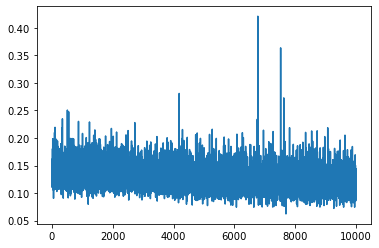

In [21]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('Loss over Epochs')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy over Epochs')